# Diabete Binary Classification Dataset

| Input Features |
|----------------|
| *preg_count* |
| *glucose_concentration* |
| *diastolic_bp* |
| *triceps_skin_fold_thickness* |
| *two_hr_serum_insulin* |
| *bmi* |
| *diabetes_pedi* |
| *age* |

|Target Feature | Objective |
|---------------|-----------|
| *diabetes_class* | Predict *diabetes_class* for given input features |

This example uses *Pima Indians* correlated data, contained in *pima_indians_diabetes_all.csv*. **Note: This data is not available anymore on UCI, due to permissions.**

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Setup Columns

In [2]:
columns = ['diabetes_class', 'preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age']

In [3]:
df = pd.read_csv('pima_indians_diabetes_all.csv') # create dataframe

In [5]:
df.describe() # generate descriptive statistics

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


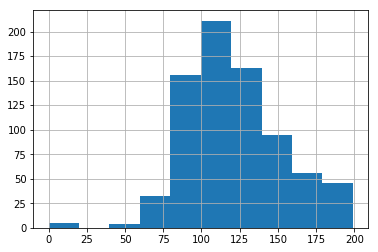

In [7]:
df['glucose_concentration'].hist() # display glucose concentration values in histogram
plt.show()
# note much of the data is anchored at minimum value of 0

In [9]:
df['diabetes_class'].value_counts()

0    500
1    268
Name: diabetes_class, dtype: int64

Class rersults: 500 cases are normal. 268 cases are diabetic.

## Separate diabetic and normal saamples

In [10]:
diabetic = df.diabetes_class == 1
normal = df.diabetes_class == 0

## Display the samples' glucose split in histogram

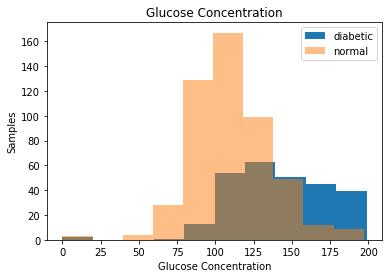

In [13]:
plt.hist(df[diabetic].glucose_concentration,label='diabetic')
plt.hist(df[normal].glucose_concentration,alpha=0.5, label='normal')
plt.title('Glucose Concentration')
plt.xlabel('Glucose Concentration')
plt.ylabel('Samples')
plt.legend()
plt.show()

## BMI Histogram

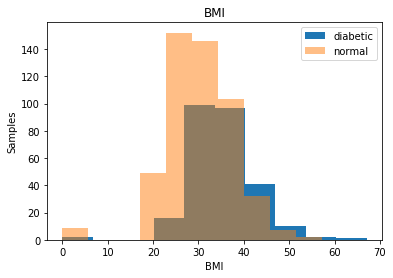

In [14]:
plt.hist(df[diabetic].bmi,label='diabetic')
plt.hist(df[normal].bmi,alpha=0.5, label='normal')
plt.title('BMI')
plt.xlabel('BMI')
plt.ylabel('Samples')
plt.legend()
plt.show()

## Age Histogram

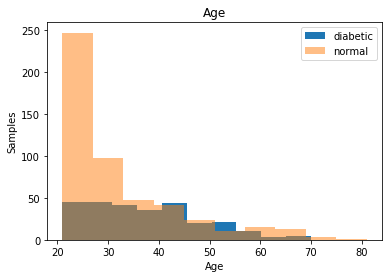

In [15]:
# Age
plt.hist(df[diabetic].age,label='diabetic')
plt.hist(df[normal].age,alpha=0.5,label='normal')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Samples')
plt.legend()
plt.show()

# Training and Validation Set

## Target Variable as first column followed by input features

*Note: Training, Validation files do not have a column header*

In [16]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(200)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [17]:
rows = df.shape[0]
train = int(0.7 * rows)
test = rows - train

In [18]:
rows, train, test # display shape

(768, 537, 231)

## Write Training Set

In [19]:
df[:train].to_csv('diabetesTrain.csv',
                 index=False,
                 index_label='Row', header=False,
                 columns=columns)

## Write Validation Set

In [20]:
df[train:].to_csv('diabetesValidation.csv',
                 index=False,
                 index_label='Row', header=False,
                 columns=columns)

In [21]:
## Write Column List

In [ ]:
with open('diabetesTrain_columnList.txt','w') as f:
    f.write(','.)